##classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import random

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingClassifier
from sklearn.linear_model import Lasso, Ridge

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(37) # Seed 고정
torch.manual_seed(37)

In [ ]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [ ]:
train_x = train_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP', 'Y_Class','Y_Quality'])
test_x = test_df.drop(columns= ['PRODUCT_ID','TIMESTAMP'])
train_y = train_df[['Y_Quality','PRODUCT_CODE']]

In [ ]:
# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


In [ ]:
train_a = train_x[train_x['PRODUCT_CODE'] == 0]
train_t = train_x[train_x['PRODUCT_CODE'] != 0]

test_a = test_x[test_x['PRODUCT_CODE'] == 0]
test_t = test_x[test_x['PRODUCT_CODE'] != 0]

train_a_y = train_y[train_y['PRODUCT_CODE'] == 'A_31']
train_t_y = train_y[train_y['PRODUCT_CODE'] != 'A_31']
train_a_y = train_a_y['Y_Quality']
train_t_y = train_t_y['Y_Quality']

print(f"Shape of A_31/T_31 : {train_a.shape} {train_t.shape}")

Shape of A_31/T_31 : (249, 2877) (349, 2877)


In [ ]:
col = train_x.columns
na_a_col = []
na_t_col = []
for i in col:
  if train_a[i].count() == 0:
    na_a_col.append(i)
  if train_t[i].count() == 0:
    na_t_col.append(i)

In [ ]:
a_col = []
t_col = []

for i in col:
  if i == 'PRODUCT_CODE' or i == 'LINE' or i == 'Y_Quality':
    continue
  if i not in na_a_col:
    a_col.append(i)
  if i not in na_t_col:
    t_col.append(i)
comm_na_col = []
for i in na_a_col:
  if i in na_t_col:
   comm_na_col.append(i)

In [ ]:
train_a.drop(comm_na_col, axis = 1, inplace = True)
train_t.drop(comm_na_col, axis = 1, inplace = True)
test_a.drop(comm_na_col, axis = 1, inplace = True)
test_t.drop(comm_na_col, axis = 1, inplace = True)
train_a.drop(t_col, axis = 1, inplace = True)
train_t.drop(a_col,axis = 1, inplace = True)
test_a.drop(t_col, axis = 1, inplace = True)
test_t.drop(a_col,axis = 1, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
print(len(train_a.columns))
print(len(train_t.columns))
print(len(test_a.columns))
print(len(test_t.columns))

2118
679
2118
679


In [ ]:
train_a = train_a.fillna(0)
train_t = train_t.fillna(0)
test_a = test_a.fillna(0)
test_t = test_t.fillna(0)

In [ ]:
# class modelA(nn.Module):
#   def __init__(self, input_size, output_size, hidden_size):
#     super(modelA,self).__init__()

#     self.input_size = input_size
#     self.output_size = output_size

#     self.linear = nn.Linear(input_size,hidden_size)
#     self.linear2 = nn.Linear(hidden_size, hidden_size)
#     self.fc = nn.Linear(hidden_size, output_size)

#     self.softmax = nn.Softmax(dim = 0)
#     self.relu = nn.ReLU()

#   def forward(self, x):
#     out = self.linear(x)
#     out = self.relu(out)
#     out = self.linear2(out)
#     out = self.relu(out)
#     out = self.fc(out)
#     return out

In [ ]:

# #GPU 체크
# is_cuda = torch.cuda.is_available()
# if is_cuda:
#   device = torch.device("cuda")
#   print("GPU is available")
# else:
#   device = torch.device("cpu")
#   print("CPU is availalbe")
     

In [ ]:
# RF_a = RandomForestClassifier(random_state=37).fit(train_a, train_a_y)
# RF_t = RandomForestClassifier(random_state=37).fit(train_t, train_t_y)
# RF_a = RandomForestRegressor(random_state=37).fit(train_a, train_a_y)
# RF_t = RandomForestRegressor(random_state=37).fit(train_t, train_t_y)

RF_a = HistGradientBoostingRegressor(random_state=37).fit(train_a, train_a_y)
RF_t = HistGradientBoostingRegressor(random_state=37).fit(train_t, train_t_y)

# RF_a = DecisionTreeClassifier(random_state=37,criterion = 'entropy').fit(train_a, train_a_y)
# RF_t = DecisionTreeClassifier(random_state=37,criterion = 'entropy').fit(train_t, train_t_y)

# RF_a = svm.SVC(random_state=37, kernel = 'poly').fit(train_a, train_a_y)
# RF_t = svm.SVC(random_state=37, kernel = 'poly').fit(train_t, train_t_y)

# RF_a = SGDClassifier(random_state=37).fit(train_a, train_a_y)
# RF_t = SGDClassifier(random_state=37).fit(train_t, train_t_y)

# RF_a = LogisticRegression(random_state=37).fit(train_a, train_a_y)
# RF_t = LogisticRegression(random_state=37).fit(train_t, train_t_y)
# lr = 0.0001
# RF_a = modelA(train_a.shape[1],1,(train_a.shape[1]//2)).to(device)
# RF_t = modelA(train_t.shape[1],1,(train_t.shape[1]//2)).to(device)
# optimizer_a = torch.optim.Adam(RF_a.parameters(), lr = lr)
# optimizer_t = torch.optim.Adam(RF_a.parameters(), lr = lr)
# cost_a = nn.CrossEntropyLoss().cuda()
# cost_t = nn.CrossEntropyLoss().cuda()
# cost_a = nn.MSELoss().cuda()
# cost_t = nn.MSELoss().cuda()
# RF_a = Ridge(random_state=37).fit(train_a, train_a_y)
# RF_t = Ridge(random_state=37).fit(train_t, train_t_y)

print('Done.')

Done.


In [ ]:
# """ df to tensor for deep learning"""
# train_a_tensorx = torch.FloatTensor(train_a.values).to(device)
# train_a_tensory = torch.FloatTensor(train_a_y.values).view(-1).to(device)
# test_a_tensorx = torch.FloatTensor(test_a.values).to(device)

# train_t_tensorx = torch.FloatTensor(train_t.values).to(device)
# train_t_tensory = torch.FloatTensor(train_t_y.values).view(-1).to(device)
# test_t_tensorx = torch.FloatTensor(test_t.values).to(device)

# print(train_a_tensorx.shape)
# print(test_a_tensorx.shape)
# print(test_t_tensorx.shape)

In [ ]:
# """ deep learning training"""
# num_epochs = 5000
# for epoch in range(num_epochs + 1):
#   outputs = RF_a.forward(train_a_tensorx)
#   costs = cost_a(outputs, train_a_tensory)

#   optimizer_a.zero_grad()
#   costs.backward()
#   optimizer_a.step()

#   if epoch%1000 == 0:
#     print(f'Epoch{epoch} : {costs}')

# num_epochs = 1000
# for epoch in range(num_epochs + 1):
#   outputs = RF_t.forward(train_t_tensorx)
#   costt = cost_t(outputs, train_t_tensory)

#   optimizer_t.zero_grad()
#   costt.backward()
#   optimizer_t.step()
#   if epoch%100 == 0:
#     print(f'Epoch{epoch}  : {costt}')

In [ ]:
# pred_a = torch.argmax(preds_ac.cpu(), dim = 1).numpy()
# pred_t = torch.argmax(preds_tc.cpu(), dim = 1).numpy()
pred_a = RF_a.predict(test_a)
pred_t = RF_t.predict(test_t)
# pred_a = RF_a(test_a_tensorx).cpu().detach().numpy()
# pred_t = RF_t(test_t_tensorx).cpu().detach().numpy()

In [ ]:
print(np.min(pred_a), np.max(pred_a), np.mean(pred_a))
print(np.min(pred_t), np.max(pred_t), np.mean(pred_t))

0.5159033012104385 0.5440425147632482 0.5296717491937787
0.516295879045746 0.5352718905554894 0.5283355860400599


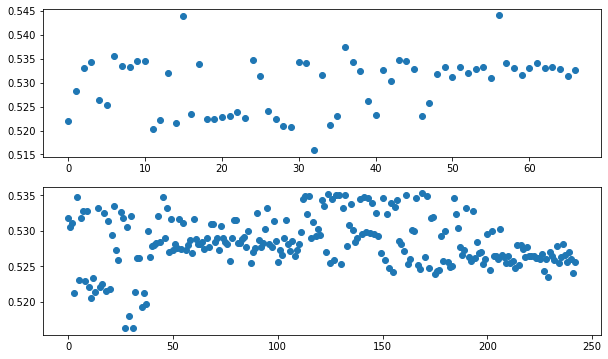

In [ ]:
plt.figure(figsize = (10,6))
plt.subplot(2,1,1)
plt.scatter(range(len(pred_a)), pred_a)

plt.subplot(2,1,2)
plt.scatter(range(len(pred_t)), pred_t)

plt.show()

In [ ]:
test_pred = []
a_cnt = 0
t_cnt = 0
test_prd = test_df['PRODUCT_CODE']
for idx,i in enumerate(test_prd):
  if i == 'A_31':
    test_pred.append(pred_a[a_cnt])
    a_cnt += 1
  else:
    test_pred.append(pred_t[t_cnt])
    t_cnt+=1

In [ ]:
print(test_pred)

[0.531745792009533, 0.5305824247027282, 0.531034135156825, 0.5220304647638567, 0.5282843246759823, 0.532960449081773, 0.5343841229548272, 0.5263053880740748, 0.5253910179172598, 0.5354731133655395, 0.5333846975682424, 0.5332733547364555, 0.5345552061207046, 0.5345096228076298, 0.5203043963897794, 0.5212233931113874, 0.5347513008123574, 0.5230198068402875, 0.5317481044228627, 0.5327184642542387, 0.5228750889084391, 0.5328177864229884, 0.522126158940197, 0.5205842734334153, 0.5232989073969709, 0.5213328896907374, 0.533199862208927, 0.5220405943903357, 0.5225080486825809, 0.5325567956391365, 0.5215406189477877, 0.531350902760003, 0.5218303337199406, 0.5294623262981094, 0.5335281541385062, 0.5221130596097406, 0.5320228935847698, 0.521589567917003, 0.5440102085615744, 0.5234127582528816, 0.5338618697216843, 0.5225081011413938, 0.5223581495333876, 0.5272817502444321, 0.5259283488829394, 0.5326442128125101, 0.5318337086988231, 0.5163320589200243, 0.5305714341113748, 0.5179663691228684, 0.5321

In [ ]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
train_x = train_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP', 'Y_Class'])
test_x = test_df.drop(columns= ['PRODUCT_ID','TIMESTAMP'])
train_y = train_df[['Y_Class','PRODUCT_CODE']]

In [ ]:
# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i])
    train_x[i] = le.transform(train_x[i])
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


In [ ]:
train_a = train_x[train_x['PRODUCT_CODE'] == 0]
train_t = train_x[train_x['PRODUCT_CODE'] != 0]

test_a = test_x[test_x['PRODUCT_CODE'] == 0]
test_t = test_x[test_x['PRODUCT_CODE'] != 0]

train_a_y = train_y[train_y['PRODUCT_CODE'] == 'A_31']
train_t_y = train_y[train_y['PRODUCT_CODE'] != 'A_31']
train_a_y = train_a_y['Y_Class']
train_t_y = train_t_y['Y_Class']

print(f"Shape of A_31/T_31 : {train_a.shape} {train_t.shape}")

Shape of A_31/T_31 : (249, 2878) (349, 2878)


In [ ]:
col = train_x.columns
na_a_col = []
na_t_col = []
for i in col:
  if train_a[i].count() == 0:
    na_a_col.append(i)
  if train_t[i].count() == 0:
    na_t_col.append(i)

In [ ]:
a_col = []
t_col = []

for i in col:
  if i == 'PRODUCT_CODE' or i == 'LINE' or i == 'Y_Quality':
    continue
  if i not in na_a_col:
    a_col.append(i)
  if i not in na_t_col:
    t_col.append(i)
comm_na_col = []
for i in na_a_col:
  if i in na_t_col:
   comm_na_col.append(i)

In [ ]:
train_a.drop(comm_na_col, axis = 1, inplace = True)
train_t.drop(comm_na_col, axis = 1, inplace = True)
test_a.drop(comm_na_col, axis = 1, inplace = True)
test_t.drop(comm_na_col, axis = 1, inplace = True)
train_a.drop(t_col, axis = 1, inplace = True)
train_t.drop(a_col,axis = 1, inplace = True)
test_a.drop(t_col, axis = 1, inplace = True)
test_t.drop(a_col,axis = 1, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
train_a = train_a.fillna(0)
train_t = train_t.fillna(0)
test_a = test_a.fillna(0)
test_t = test_t.fillna(0)

In [ ]:
test_a['Y_Quality'] = pred_a
test_t['Y_Quality'] = pred_t

In [ ]:
new_cola = ['Y_Quality'] + test_a.columns.to_list()[:-1]
new_colt = ['Y_Quality'] + test_t.columns.to_list()[:-1]
test_a = test_a[new_cola]
test_t = test_t[new_colt]

In [ ]:
RF_a =HistGradientBoostingClassifier(random_state=37).fit(train_a, train_a_y)
RF_t = HistGradientBoostingClassifier(random_state=37).fit(train_t, train_t_y)

In [ ]:
pred_a1 = RF_a.predict(test_a)
pred_t1 = RF_t.predict(test_t)

In [ ]:
test_pred = []
a_cnt = 0
t_cnt = 0
test_prd = test_df['PRODUCT_CODE']
for idx,i in enumerate(test_prd):
  if i == 'A_31':
    test_pred.append(pred_a1[a_cnt])
    a_cnt += 1
  else:
    test_pred.append(pred_t1[t_cnt])
    t_cnt+=1

submission

In [ ]:
submit = pd.read_csv('./sample_submission.csv')
submit['Y_Class'] = test_pred
submit.to_csv('./baseline_submission.csv', index=False)

In [ ]:
# preds_ac = RF_a.predict(test_a)
# preds_tc = RF_t.predict(test_t)
# print('Done.')

In [ ]:
# min_df = 0.525068
# max_df = 0.534843

In [ ]:
# plt.figure(figsize = (10,6))
# plt.scatter(range(len(preds_ac)),preds_ac, label = "pred")
# plt.scatter(range(len(test_a_y)), test_a_y, label = "actual")
# plt.ylim(-0.1,2.1)
# plt.legend()
# plt.show()

In [ ]:
# plt.figure(figsize = (10,6))
# plt.scatter(range(len(preds_tc)),preds_tc, label = "pred")
# plt.scatter(range(len(test_t_y)), test_t_y, label = "actual")
# plt.ylim(-0.1,2.1)
# plt.legend()
# plt.show()

In [ ]:
# print(accuracy_score(preds_ac, test_a_y))
# print(accuracy_score(preds_tc, test_t_y))